In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Cleaning the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.gender.unique()

array(['female', 'male'], dtype=object)

In [5]:
#df.race/ethnicity.unique()   gives error with column name.We will need to rename this column
df.rename(columns={'race/ethnicity':'ethnicity'},inplace=True)
df.ethnicity.unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [6]:
df.rename(columns={'parental level of education':'parents_education_level'},inplace=True)
df.parents_education_level.unique()
df.parents_education_level=df.parents_education_level.astype('string')

In [7]:
df.parents_education_level.value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parents_education_level, dtype: Int64

In [8]:
df.lunch.unique()
df.lunch=df.lunch.astype('string')

In [9]:
df.rename(columns={'test preparation course':'test_preparation_course','math score':'math_score','reading score':'reading_score','writing score':'writing_score'},inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   1000 non-null   object
 1   ethnicity                1000 non-null   object
 2   parents_education_level  1000 non-null   string
 3   lunch                    1000 non-null   string
 4   test_preparation_course  1000 non-null   object
 5   math_score               1000 non-null   int64 
 6   reading_score            1000 non-null   int64 
 7   writing_score            1000 non-null   int64 
dtypes: int64(3), object(3), string(2)
memory usage: 62.6+ KB


In [11]:
df.test_preparation_course.unique()
df.test_preparation_course=df.test_preparation_course.astype('string')

In [12]:
df.math_score.unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64)

In [13]:
df.reading_score.unique()

array([ 72,  90,  95,  57,  78,  83,  43,  64,  60,  54,  52,  81,  53,
        75,  89,  32,  42,  58,  69,  73,  71,  74,  70,  65,  87,  56,
        61,  84,  55,  44,  41,  85,  59,  17,  39,  80,  37,  63,  51,
        49,  26,  68,  45,  47,  86,  34,  79,  66,  67,  91, 100,  76,
        77,  82,  92,  93,  62,  88,  50,  28,  48,  46,  23,  38,  94,
        97,  99,  31,  96,  24,  29,  40], dtype=int64)

In [14]:
df.writing_score.unique()

array([ 74,  88,  93,  44,  75,  78,  92,  39,  67,  50,  52,  43,  73,
        70,  58,  86,  28,  46,  61,  63,  53,  80,  72,  55,  65,  38,
        82,  79,  83,  59,  57,  54,  68,  66,  62,  76,  48,  42,  87,
        49,  10,  34,  71,  37,  56,  41,  22,  81,  45,  36,  89,  47,
        90, 100,  64,  98,  51,  40,  84,  69,  33,  60,  85,  91,  77,
        27,  94,  95,  19,  35,  32,  96,  97,  99,  15,  30,  23],
      dtype=int64)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   1000 non-null   object
 1   ethnicity                1000 non-null   object
 2   parents_education_level  1000 non-null   string
 3   lunch                    1000 non-null   string
 4   test_preparation_course  1000 non-null   string
 5   math_score               1000 non-null   int64 
 6   reading_score            1000 non-null   int64 
 7   writing_score            1000 non-null   int64 
dtypes: int64(3), object(2), string(3)
memory usage: 62.6+ KB


In [16]:
df.gender=df['gender'].astype('string')

In [17]:
df.ethnicity=df.ethnicity.astype('string')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   1000 non-null   string
 1   ethnicity                1000 non-null   string
 2   parents_education_level  1000 non-null   string
 3   lunch                    1000 non-null   string
 4   test_preparation_course  1000 non-null   string
 5   math_score               1000 non-null   int64 
 6   reading_score            1000 non-null   int64 
 7   writing_score            1000 non-null   int64 
dtypes: int64(3), string(5)
memory usage: 62.6 KB


# Exploring the data

In [19]:
df.head()

,gender,ethnicity,parents_education_level,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


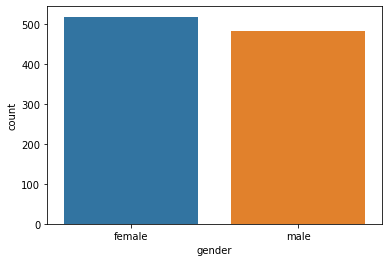

In [20]:
sns.countplot(x='gender',data=df)
plt.show()
#Overall the number of females is slightly more than the number of boys

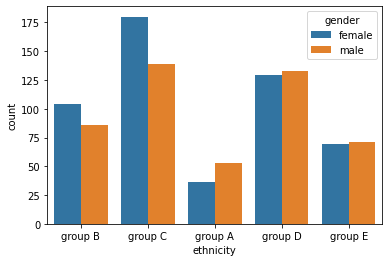

In [21]:
sns.countplot(x='ethnicity',hue='gender',data=df)
plt.show()
#Group C has highest number of females. The ratio is more or less stable for the other groups

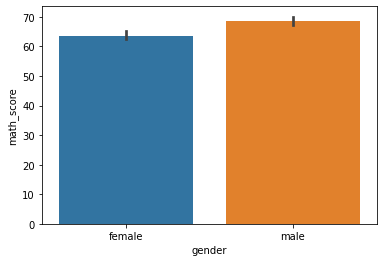

In [22]:
sns.barplot(y='math_score',x='gender',data=df)
plt.show()
#The males have scored higher than the females in maths

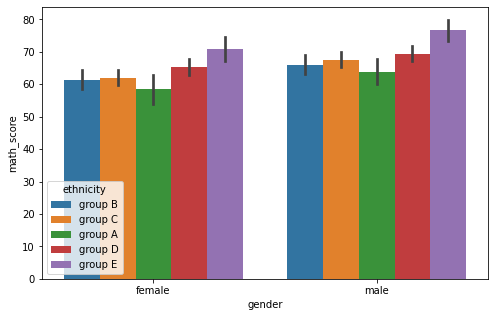

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(y='math_score',x='gender',hue='ethnicity',data=df)
plt.show()
#Group E performs best for both the genders. Whereas Group A performs worst for both the genders

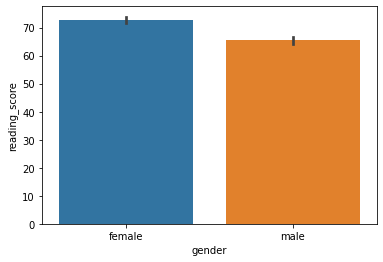

In [24]:
sns.barplot(x='gender',y='reading_score',data=df)
plt.show()
#When it comes to reading, the females score better

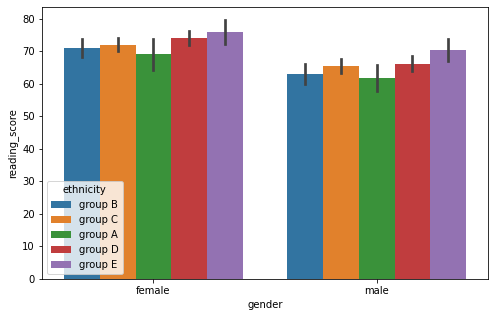

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(x='gender',y='reading_score',hue='ethnicity',data=df)
plt.show()
#Here in reading too, the Group E is the best performer and again Group A is at the bottom

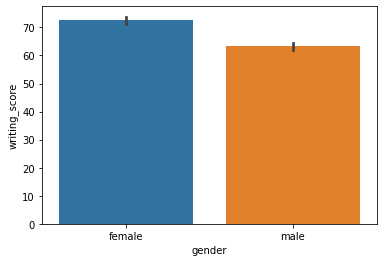

In [26]:
sns.barplot(x='gender',y='writing_score',data=df)
plt.show()
#The females perform better in reading too

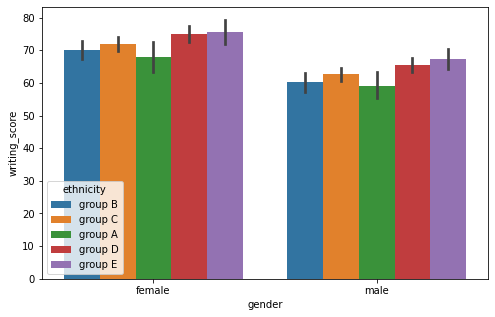

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(x='gender',y='writing_score',hue='ethnicity',data=df)
plt.show()
#Here too the Group E is the best performer.

Lets further explore the Group E which is the best performer.

In [28]:
Gp_E=df[df.ethnicity.str.contains('group E',regex=True)]
Gp_E.reset_index(inplace=True,drop=True)
Gp_E


,gender,ethnicity,parents_education_level,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group E,master's degree,free/reduced,none,56,72,65
1,male,group E,some college,standard,none,97,87,82
2,male,group E,associate's degree,standard,completed,81,81,79
3,female,group E,associate's degree,free/reduced,none,50,56,54
4,male,group E,some college,standard,none,53,55,48
...,...,...,...,...,...,...,...,...
135,female,group E,associate's degree,standard,none,100,100,100
136,female,group E,associate's degree,standard,none,68,76,67
137,male,group E,some high school,standard,completed,81,75,76
138,male,group E,high school,free/reduced,completed,86,81,75


In [55]:
Gp_E.groupby('gender')[['math_score','reading_score','writing_score']].mean()

,math_score,reading_score,writing_score
gender,,,
female,70.811594,75.840580,75.536232
male,76.746479,70.295775,67.394366


In [30]:
Gp_E.parents_education_level.value_counts()
#Maximum number of the parents in this group have completed the Associates Degree and Minimum number have done Masters Degree


associate's degree    39
some college          35
high school           22
bachelor's degree     18
some high school      18
master's degree        8
Name: parents_education_level, dtype: Int64

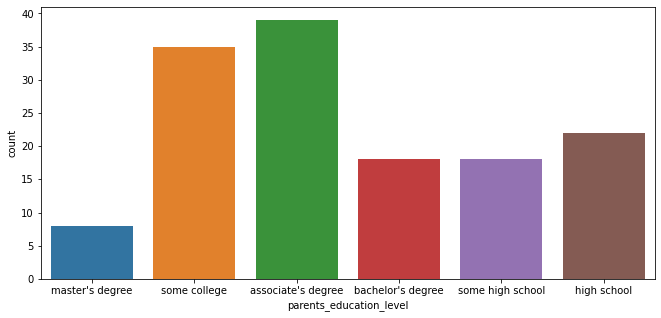

In [31]:
plt.figure(figsize=(11,5))
sns.countplot(x='parents_education_level',data=Gp_E)
plt.show()
#As is evident, here associates degree is the most common level of education,while Masters is least common

In [54]:
Gp_E.groupby('parents_education_level')[['math_score','reading_score','writing_score']].mean()
#As is evident, for math_score, all groups have similar avg score. But for reading and writing score, the kids of parents with Master's degree, score highest.

,math_score,reading_score,writing_score
parents_education_level,,,
associate's degree,74.897436,73.820513,73.205128
bachelor's degree,76.555556,74.833333,75.388889
high school,70.772727,70.318182,67.545455
master's degree,74.625000,82.125000,80.500000
some college,73.828571,72.628571,70.200000
some high school,72.111111,69.555556,66.555556


Now lets look at the worst performing Group A

In [33]:
Gp_A=df[df.ethnicity=='group A']
Gp_A.reset_index(drop=True,inplace=True)
Gp_A

,gender,ethnicity,parents_education_level,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group A,associate's degree,free/reduced,none,47,57,44
1,male,group A,some college,standard,completed,78,72,70
2,female,group A,master's degree,standard,none,50,53,58
3,male,group A,master's degree,free/reduced,none,73,74,72
4,female,group A,associate's degree,standard,completed,55,65,62
...,...,...,...,...,...,...,...,...
84,female,group A,some college,standard,none,54,63,67
85,female,group A,some college,standard,completed,78,87,91
86,male,group A,high school,standard,none,57,51,54
87,female,group A,some high school,free/reduced,none,44,45,45


In [34]:
Gp_A.parents_education_level.value_counts()


some high school      24
high school           18
some college          18
associate's degree    14
bachelor's degree     12
master's degree        3
Name: parents_education_level, dtype: Int64

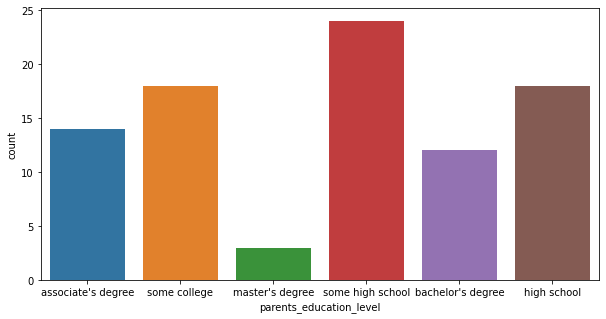

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x='parents_education_level',data=Gp_A)
plt.show()
#As is evident,the most common level of education here is High school,and the least common here is Masters Degree. However, unlike Group E, here the number of parents with Masters degree are lesser.

In [40]:
Gp_A.groupby('parents_education_level')[['math_score','reading_score','writing_score']].mean()
#Here for math_score,surprisingly,the kids of parents with Masters Degree have performed worst! For reading and writing,all the kids perform almost at same level.

,math_score,reading_score,writing_score
parents_education_level,,,
associate's degree,61.000000,67.071429,63.571429
bachelor's degree,67.166667,68.083333,68.333333
high school,60.444444,62.888889,60.500000
master's degree,57.666667,64.666667,67.666667
some college,63.888889,65.777778,65.000000
some high school,58.916667,62.083333,58.583333


In [43]:
l=list(df.groupby('lunch')[['ethnicity','parents_education_level']])

In [50]:
free_lunch=l[0][1]

group C    114
group D     95
group B     69
group E     41
group A     36
Name: ethnicity, dtype: Int64

In [51]:
free_lunch.ethnicity.value_counts()

group C    114
group D     95
group B     69
group E     41
group A     36
Name: ethnicity, dtype: Int64

In [49]:
lunch_std=l[1][1]
lunch_std

,gender,ethnicity,parents_education_level,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
987,male,group E,some high school,standard,completed,81,75,76
991,female,group B,some high school,standard,completed,65,82,78
994,male,group A,high school,standard,none,63,63,62
995,female,group E,master's degree,standard,completed,88,99,95


In [52]:
lunch_std.ethnicity.value_counts()

group C    205
group D    167
group B    121
group E     99
group A     53
Name: ethnicity, dtype: Int64

In [53]:
df.ethnicity.value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: ethnicity, dtype: Int64